In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

churn_data = pd.read_csv(
    'https://github.com/Tio147/DS_1/raw/main/project_0.5/churn.zip',
    #'https://raw.githubusercontent.com/Tio147/DS_1/main/project_0.5/churn.csv',
    compression='zip'
    )
churn_data = churn_data.drop('RowNumber', axis=1)
churn_data.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


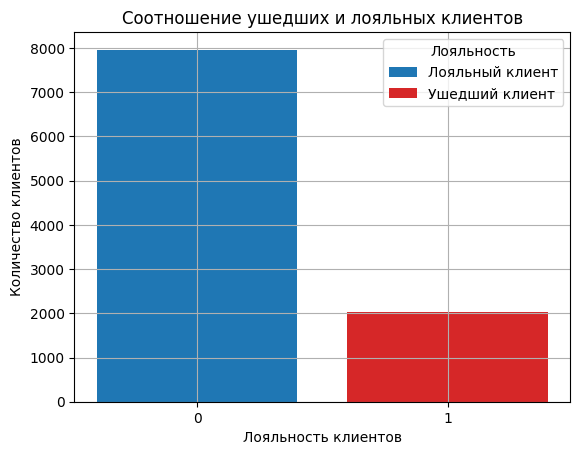

In [155]:
# 9.1. Каково соотношение ушедших и лояльных клиентов? 
# Покажите это на графике и дайте комментарий по соотношению.

# Группируем DataFrame по ушедшим клиентам и подсчитываем коллличество клиентов в каждой группе
exited_data = churn_data.groupby(by='Exited', as_index=False)['CustomerId'].count()

# Приводим столбец 'Exited' к типу данных строка для корректного отображения на графике
exited_data['Exited'] = exited_data['Exited'].astype('string')

# Создаем столбчатую диаграмму
fig, ax = plt.subplots()
bar_labels = ['Лояльный клиент', 'Ушедший клиент']
bar_colors = ['tab:blue', 'tab:red']
ax.bar(exited_data['Exited'], exited_data['CustomerId'], label=bar_labels, color=bar_colors)
ax.set_ylabel('Количество клиентов')
ax.set_xlabel('Лояльность клиентов')
ax.set_title('Соотношение ушедших и лояльных клиентов')
ax.legend(title='Лояльность')
ax.grid()


9.1. Каково соотношение ушедших и лояльных клиентов? 

Соотношение ушедших клиентов к лояльным составляет почти одном к четырем.
То есть в представленном наборе данных банк потерял около 20% клиентов (каждого пятого клиента).

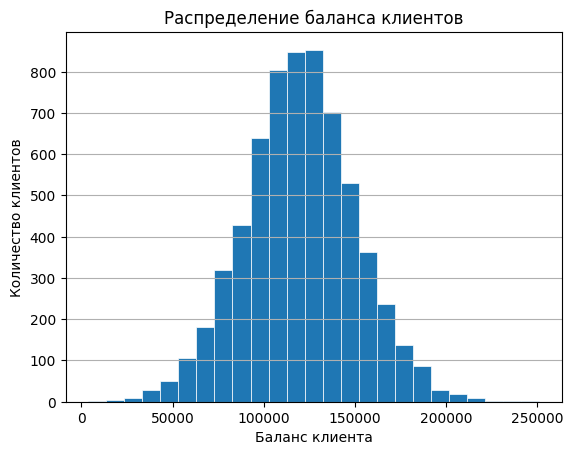

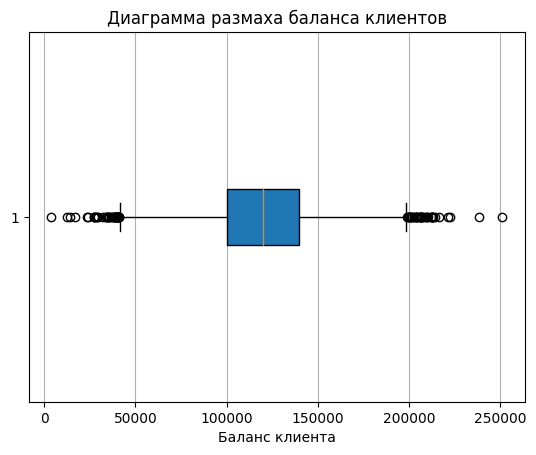

In [3]:
# 9.2. Постройте график, показывающий распределение баланса пользователей, у которых на счету больше 2 500 долларов.
# Опишите распределение и сделайте выводы.

# Фильтруем данные по состоянию счета клиентов
balance_df = churn_data[churn_data['Balance'] > 2500]

# Создаем гистограмму
fig, ax = plt.subplots()
ax.hist(balance_df['Balance'], 
        bins=25, 
        linewidth=0.5, 
        edgecolor="white"        
        )

# Повышаем информативность
ax.set_ylabel('Количество клиентов')
ax.set_xlabel('Баланс клиента')
ax.set_title('Распределение баланса клиентов')
ax.grid(axis='y')
plt.show()

# Создаем диаграмму размаха
fig, ax = plt.subplots()

# Повышаем информативность
ax.boxplot(balance_df['Balance'], patch_artist=True, vert=False)
ax.set_title('Диаграмма размаха баланса клиентов')
ax.set_xlabel('Баланс клиента')
ax.grid(axis='x')
plt.show()

9.2 Опишите распределение и сделайте выводы.

На гистограмме видно, что количество клиентов по величине баланса возрастает и убывает практический с одинаковой скоростью.
Пик распределения приходится на группу клиентов, имееющих на счету от 120 до 130 тысяч долларов (898 клиентов).

В целом клиентов банка можно назвать состоятельными - половина клиентов банка имеют на счетах от 100 до 140 тысяч долларов.
Имеется один клиент с минимальной суммой на счете менее 10 тысяч долларов и один клиент с максимальной суммой на счету более 250 тысяч долларов. 
Распределение можно назвать нормальным.

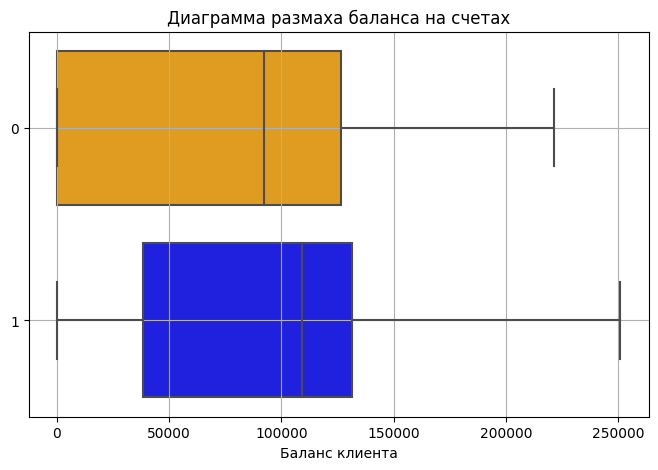

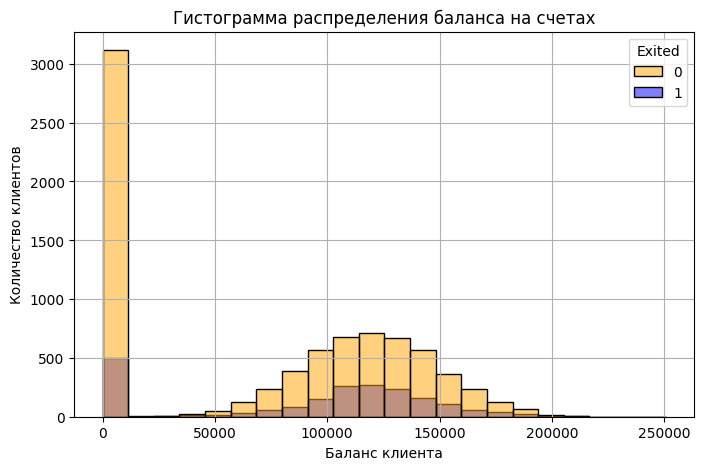

count    3618.000000
mean        1.041650
std        62.655058
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max      3768.690000
Name: Balance, dtype: float64

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
8427,15806771,Yefremova,753,France,Female,40,0,3768.69,2,1,0,177065.24,1


In [136]:
# 9.3. Посмотрите на распределение баланса клиента в разрезе признака оттока. 
# Как различаются суммы на накопительном счёте ушедших и лояльных клиентов? 
# Подумайте и напишите, с чем это может быть связано, что может не устраивать ушедших клиентов в банке.

# Строим диаграмму размаха по балансу для ушедших (1) и лояльных (0) клиентов

fig = plt.figure(figsize=(8, 5))
box=sns.boxplot(
    data=churn_data,
    x='Balance',
    y='Exited',
    orient='h',
    palette=['orange', 'blue']
)
box.set_title('Диаграмма размаха баланса на счетах')
box.set_xlabel('Баланс клиента')
box.set_ylabel('')
box.grid()

plt.show()

# Чтобы понять почему минимум диаграммы для лояльных клиентов совпал с Q25 построим ступенчатую диаграмму
fig = plt.figure(figsize=(8, 5))
hist=sns.histplot(
    data=churn_data, 
    x='Balance', 
    hue='Exited',
    palette=['orange', 'blue']
)
hist.set_title('Гистограмма распределения баланса на счетах')
hist.set_xlabel('Баланс клиента') 
hist.set_ylabel('Количество клиентов')
hist.grid()

plt.show()

# Проверим статистику по клиентам с низким балансом
low_balance = churn_data[churn_data['Balance'] < 10000]['Balance'].describe()
display(low_balance)

# Найдем количество клиентов в группе с балансом выше нуля
count = churn_data[(churn_data['Balance'] < 10000) & (churn_data['Balance'] > 0)]
display(count)

9.3. Как различаются суммы на накопительном счёте ушедших и лояльных клиентов? 
Подумайте и напишите, с чем это может быть связано, что может не устраивать ушедших клиентов в банке.

На диаграмме размаха видно, что медианное значение у лояльных клиентов меньше, чем и ушедших клиентов то есть у 50% лояльных клиентов денег на счете меньше, чем у ушедших. 25 квартиль для лояльных клиентов совпал с минимумом - это говорит о том что 25% клиентов имеют низкий баланс на счету. На гистограмме видно, что среди клиентов большое количество клиентов с балансом до 10000, у лояльных клиентов это явно доминирующая группа.
Если посмотреть на статистику этой группы клиентов можно увидеть, что средний баланс по группе близок к единице, а максимальное значение почти совпадает с количеством клиентов. То есть в данной группе всего один клиент с балансом выше нуля. И дейстивтельно это пользователь с номером 15806771. 
Скорее всего банк специализируется на кредитах поэтому имеется большое количество клиентов с нулевым счетом. Что касается ушедших клиентов - среди них значительно меньше тех кто берет кредиты. Возможно ушедших клиентов больше интересовали ставки по вкладам и у конкурентов они оказались выше.

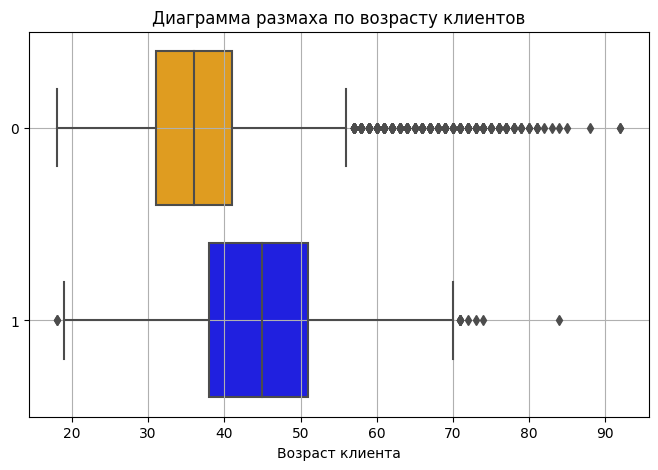

In [138]:
# 9.4. Посмотрите на распределение возраста в разрезе признака оттока. 
# В какой группе больше потенциальных выбросов? 
# На какую возрастную категорию клиентов стоит обратить внимание банку?



fig = plt.figure(figsize=(8, 5))
box=sns.boxplot(
    data=churn_data,
    x='Age',
    y='Exited',
    orient='h',
    palette=['orange', 'blue']
)
box.set_title('Диаграмма размаха по возрасту клиентов')
box.set_xlabel('Возраст клиента')
box.set_ylabel('')
box.grid()

plt.show()

9.4 В какой группе больше потенциальных выбросов? 
На какую возрастную категорию клиентов стоит обратить внимание банку?

Потенциальных выбросов больше в группе лояльных клиентов, причем это люди старше 57 лет. Это говорит о том что основными клиентами банка являются молодые люди (медианное значение 36 лет). Среди ушедших клиентов преобладают люди среднего возраста (медианное значение 45 лет). 
Учитывая возраст клиентов и предпололжение о специализации банка на кредитах скорее всего основным продуктом является ипотечный кредит. Для сокращения отока клиентов стоит обратить внимание на людей среднего возраста, интересующихся больше ставками по вкладам.

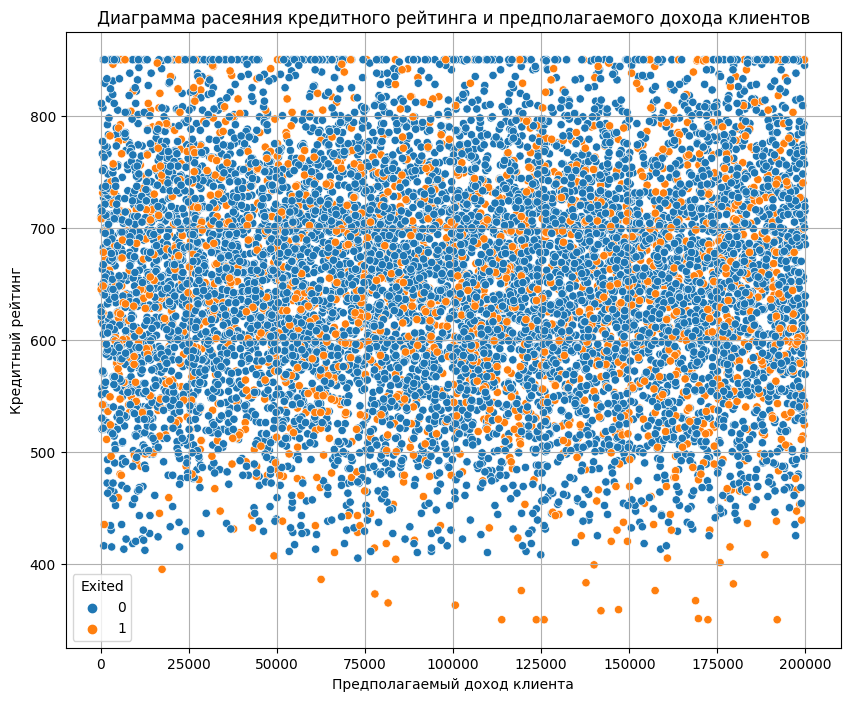

In [153]:
# 9.5. Постройте график, который показывает взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты. 
# Добавьте расцветку по признаку оттока к

fig = plt.figure(figsize=(10, 8))
scatter = sns.scatterplot(
    data=churn_data,
     x='EstimatedSalary',
     y='CreditScore',
     hue='Exited'        
)
scatter.set_title('Диаграмма расеяния кредитного рейтинга и предполагаемого дохода клиентов')
scatter.set_xlabel('Предполагаемый доход клиента')
scatter.set_ylabel('Кредитный рейтинг')
scatter.grid()
plt.show()

9.5. Какова взаимосвязь между признаками? 
Если не видите явной взаимосвязи, укажите это.

Явной взаимосвязи между кредитным рейтингом и предполагаемым доходом у лояльных и ушедших клиентов не просматривается.

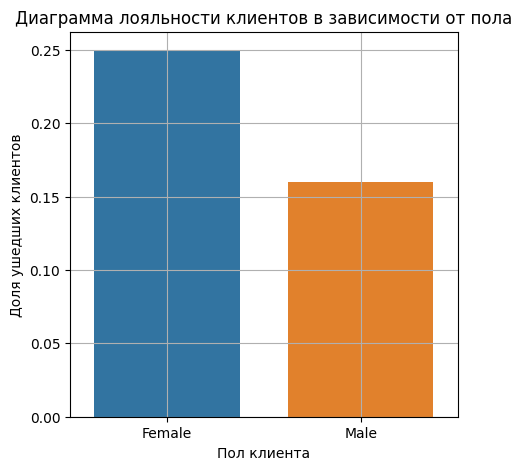

In [4]:
# 9.6. Кто чаще уходит, мужчины или женщины? Постройте график, который иллюстрирует это.

# Подсказка
# Процент ушедших клиентов в каждой группе можно рассчитать как среднее по столбцу Exited 
# (так как 1 — это ушедшие клиенты, а 0 — лояльные, среднее арифметическое по столбцу обозначает долю ушедших клиентов).

gender_df = churn_data.groupby('Gender', as_index=False)['Exited'].mean().round(2)



fig = plt.figure(figsize=(5, 5))
bar = sns.barplot(
    data=gender_df,
     x='Gender',
     y='Exited',
     width=-0.75     
     )

bar.set_title('Диаграмма лояльности клиентов в зависимости от пола')
bar.set_xlabel('Пол клиента')
bar.set_ylabel('Доля ушедших клиентов')
bar.grid()


plt.show()

9.6. Кто чаще уходит, мужчины или женщины?

На диаграмме видно что чаще уходят женщины. Среди женской группы клиентов уходит каждый четвертый клиент, среди мужской - каждый шестой.

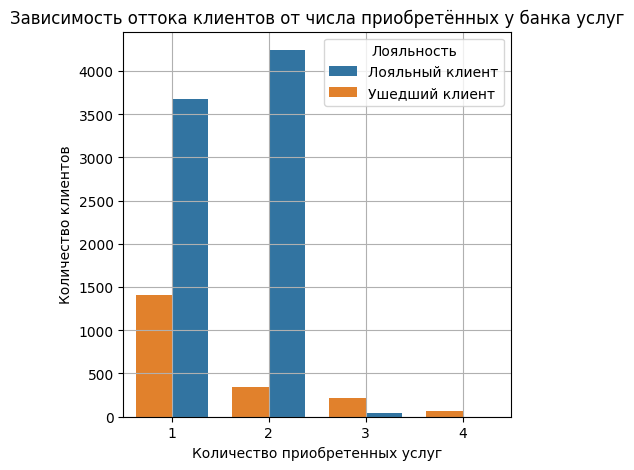

In [18]:
# 9.7. Как отток клиентов зависит от числа приобретённых у банка услуг? 
# Для ответа на этот вопрос постройте многоуровневую столбчатую диаграмму.

# Сгруппируем клиентов по признакам приобретенных услуг и оттока. Подсчитаем количество клиентов в каждой группе 
bar_data = churn_data.groupby(['NumOfProducts', 'Exited'], as_index=False)['CustomerId'].count()

# Приведем признак к типу данны "строка" для корректного отображения на диаграмме
bar_data['NumOfProducts'] = bar_data['NumOfProducts'].astype('string')

# Заменяем значения в признаке оттока для наглядности
bar_data['Exited'] = bar_data['Exited'].replace(0,'Лояльный клиент')
bar_data['Exited'] = bar_data['Exited'].replace(1,'Ушедший клиент')

fig = plt.figure(figsize=(5, 5))
bar = sns.barplot(
    data=bar_data,
    x='NumOfProducts',
    y='CustomerId',
    hue="Exited",
    width=-0.75, 
    )

bar.set_title('Зависимость оттока клиентов от числа приобретённых у банка услуг')
bar.set_xlabel('Количество приобретенных услуг')
bar.set_ylabel('Количество клиентов')
bar.grid()
bar.legend(title='Лояльность')

plt.show()

9.7. Как отток клиентов зависит от числа приобретённых у банка услуг? 

С ростом количества приобретенных услуг отток клиентов уменьшается. Наибольшее число лояльных клиентов находится в группе с двумя приобретенными услугами. Возможно это связано с тем, что банк предоставляет услуги страхования и ипотеки. Например, для клиентов с ипотекой и купивших страховку банк снижает ставку.

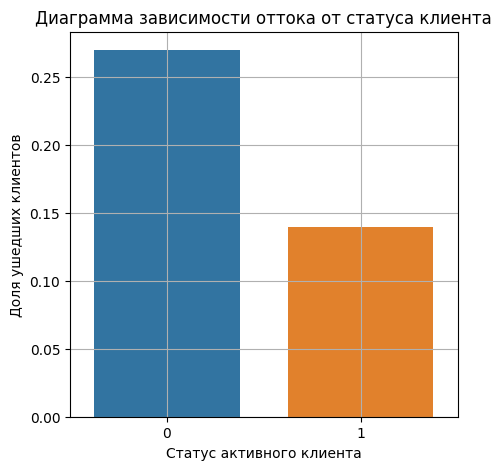

In [18]:
# 9.8. Как влияет наличие статуса активного клиента на отток клиентов? 
# Постройте диаграмму, иллюстрирующую это. Что бы вы предложили банку, 
# чтобы уменьшить отток клиентов среди неактивных?

data = churn_data.groupby(['IsActiveMember'], as_index=False)[ 'Exited'].mean().round(2)

# Приводим признак к тип данных "строка" для корректного отображения на диаграмме
data['IsActiveMember'] = data['IsActiveMember'].astype('string')

fig = plt.figure(figsize=(5, 5))
bar = sns.barplot(
    data=data,
    x='IsActiveMember',
    y='Exited',
    width=-0.75, 
    )

bar.set_title('Диаграмма зависимости оттока от статуса клиента')
bar.set_xlabel('Статус активного клиента')
bar.set_ylabel('Доля ушедших клиентов')
bar.grid()

plt.show()

9.8. Как влияет наличие статуса активного клиента на отток клиентов? 
Что бы вы предложили банку, чтобы уменьшить отток клиентов среди неактивных?

Среди клиентов с активным статусом уходит примерно 14%, с неактивным - 27%. Учитывая предполоэение о специализации банка на ипотечных кредитах можно предложить рассмотреть возможность поднятия ставки по вкладам для уменьшения отток клиентов среди неактивных.

In [ ]:
# 9.9. В какой стране доля ушедших клиентов больше? Постройте тепловую картограмму, 
# которая покажет это соотношение на карте мира. 
# Предположите, с чем это может быть связано.


data = churn_data.groupby('Geography', as_index=False)['Exited'].mean().round(2)

fig = px.choropleth(
    data_frame=data,
    locations='Geography',
    locationmode='country names',
    color='Exited',
    width=800,
    height=500,
    title='Доля ушедших клиентов по странам',
    )

fig.show()


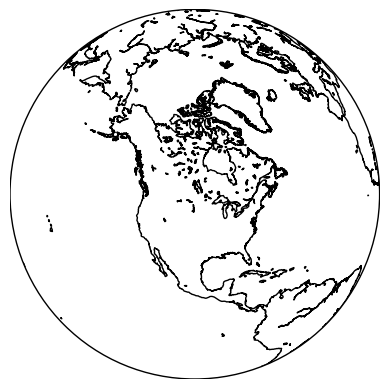

In [3]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

map = Basemap(projection='ortho', lat_0=50, lon_0=-100, resolution='l', area_thresh=1000.0)
map.drawcoastlines()
plt.show()

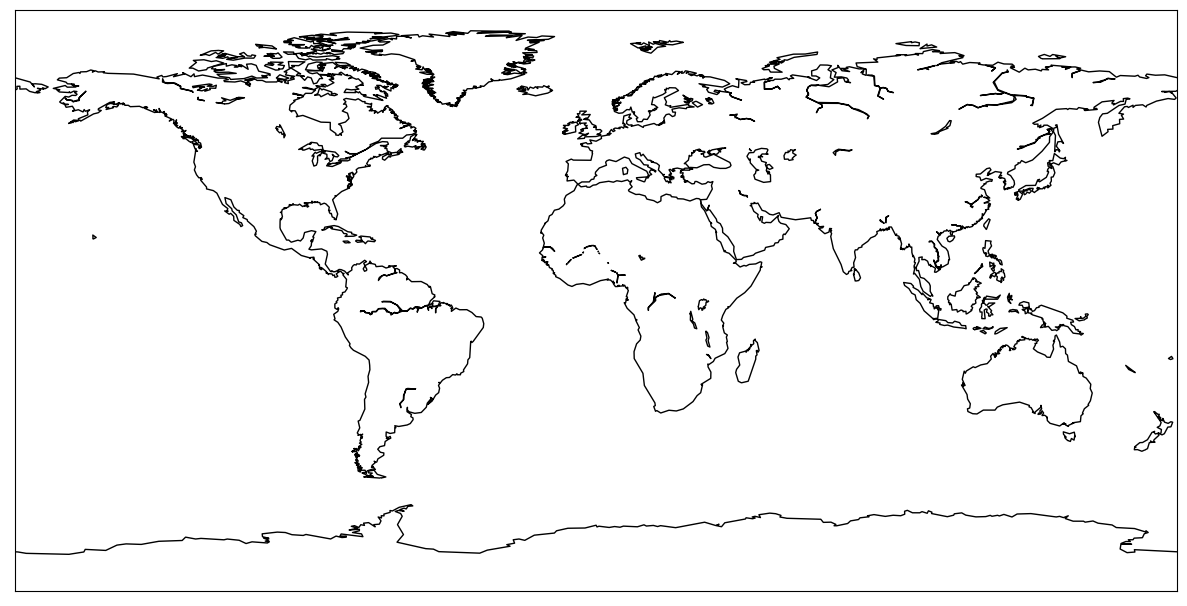

ValueError: could not convert string to float: 'France'

In [32]:

from mpl_toolkits.basemap import Basemap

fig = plt.figure(figsize=(15, 15))
m = Basemap(#projection='ortho',
            #resolution='h'
            )
#m.shadedrelief()
m.drawcoastlines()
plt.show()

data = churn_data.groupby('Geography', as_index=False)['Exited'].mean().round(2)
m=sns.heatmap(data=data, cmap='YlOrRd', annot=True)